# Tâche

Ce projet a pour but d’analyser un jeu de données issu des ventes Amazon afin de comprendre quels produits se vendent le mieux, quelles catégories sont les plus rentables, et comment les différents indicateurs commerciaux sont liés.

Pour cela, j’ai :
1. Nettoyé et préparé les données pour les rendre exploitables.
2. Calculé des statistiques descriptives (chiffre d’affaires, quantités vendues, marges).
3. Visualisé les résultats avec des graphiques pour mieux repérer les tendances.
4. Identifié les produits et catégories les plus performants.
5. Tiré des enseignements utiles pour améliorer le pilotage commercial.

Ce projet illustre comment l’analyse de données peut aider à **prendre de meilleures décisions** à partir d’un simple tableau de ventes.

# Objectifs

L’objectif de cette analyse est de tirer des enseignements concrets à partir des données de ventes Amazon, afin de mieux comprendre les leviers de performance commerciale.

Plus précisément, ce projet vise à :
- Identifier les produits et catégories qui génèrent le plus de chiffre d’affaires.
- Comprendre la relation entre le prix, les évaluations et les ventes.
- Mettre en évidence les produits les plus rentables ou les plus populaires.
- Explorer les caractéristiques qui influencent le comportement d’achat.
- Fournir des pistes d’optimisation pour orienter les décisions commerciales.

L’analyse permet ainsi de transformer un simple tableau de ventes en recommandations actionnables pour le marketing, le développement produit ou la stratégie.

In [634]:
# !pip install seaborn
# !pip install scipy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install textblob

In [635]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

In [636]:
# Chargement et création du dataframe
df = pd.read_csv('amazon.csv')

In [637]:
# Option pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [638]:
# Aperçu des données
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [639]:
# Apperçu des noms de colonnes
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [640]:
# Taille du dataframe
print(f"Le dataframe a {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le dataframe a 1465 lignes et 16 colonnes


In [641]:
# Informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [642]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Le dataset contient 1465 lignes et 16 colonnes.
Tous les types de données des colonnes sont des objets.
Les colonnes sont :

- 'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'

Il y a quelques valeurs manquantes dans le dataset, que nous examinerons et traiterons plus tard dans le notebook.

In [643]:
# Changement du type de données pour les colonnes 'discounted_price' et 'actual_price'
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype(float)

df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float)

In [644]:
# Changement du type de données et des valeurs dans le pourcentage de réduction
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['discount_percentage'] = df['discount_percentage'] / 100

In [645]:
# Recherche de chaînes inhabituelles dans la colonne des évaluations
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
5.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [646]:
# Check d'une valeur étrange
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


J'ai trouvé la note de ce produit sur Amazon en recherchant l'ID produit sur leur site officiel (amazon.in).

La note est de 3.9. Je vais donc attribuer une note de 3.9 à cet article.

In [647]:
# Modification de la valeur étrange
df['rating'] = df['rating'].replace('|', 3.9).astype(float)

In [648]:
# Changement du type de données pour la colonne 'rating_count'
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# Statistiques descriptives

Les statistiques descriptives sont un ensemble de mesures quantitatives qui résument et décrivent les principales caractéristiques d'un jeu de données.

In [650]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


Toutes les colonnes étaient de type objet, donc j'ai converti certaines en float.

Il y a 4 colonnes numériques selon le code Python ou les statistiques descriptives de la fonction describe de Python.

# Gestion des valeurs manquantes

Traiter les valeurs manquantes est crucial pour obtenir des analyses précises des données.

In [651]:
df.isnull().sum().sort_values(ascending=False)

rating_count           2
product_id             0
category               0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [652]:
# Calcul du pourcentage de valeurs manquantes
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending=False)

rating_count           0.14
product_id             0.00
category               0.00
product_name           0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [653]:
# Trouver le nombre de valeurs manquantes
df.isnull().sum().sum().item()

2

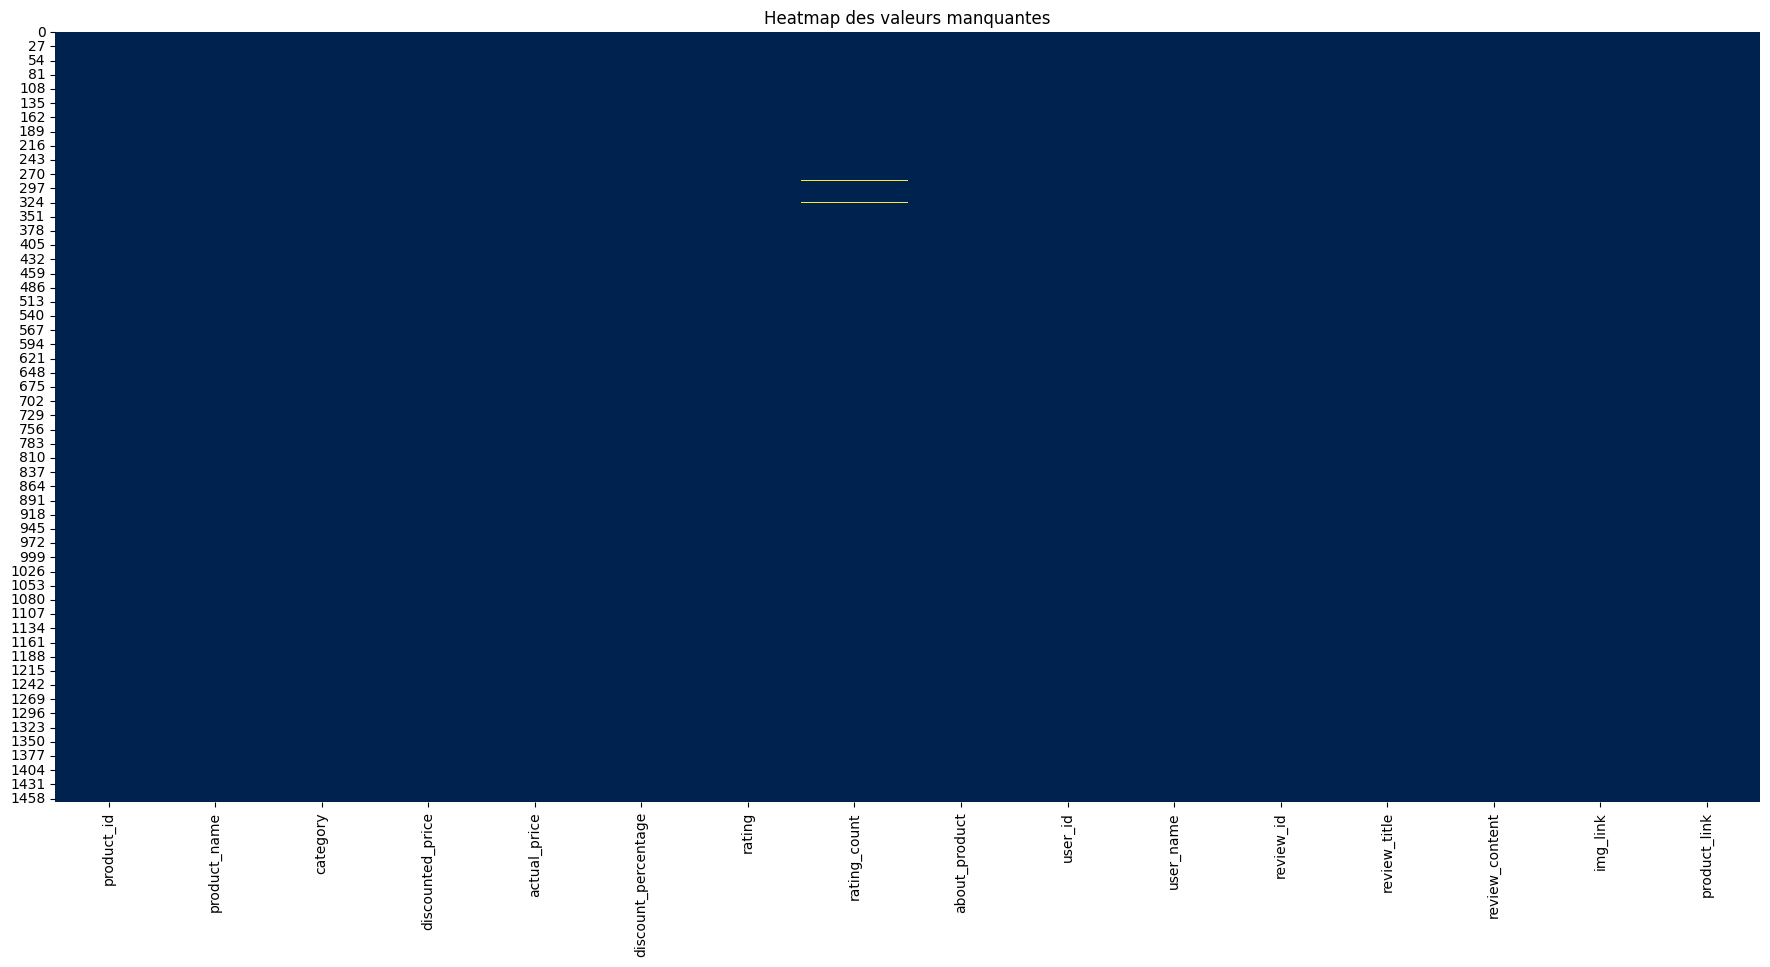

In [654]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(22, 10))
plt.title("Heatmap des valeurs manquantes")
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.show()

Nous ne visualisons que les lignes où il y a des valeurs nulles dans la colonne.


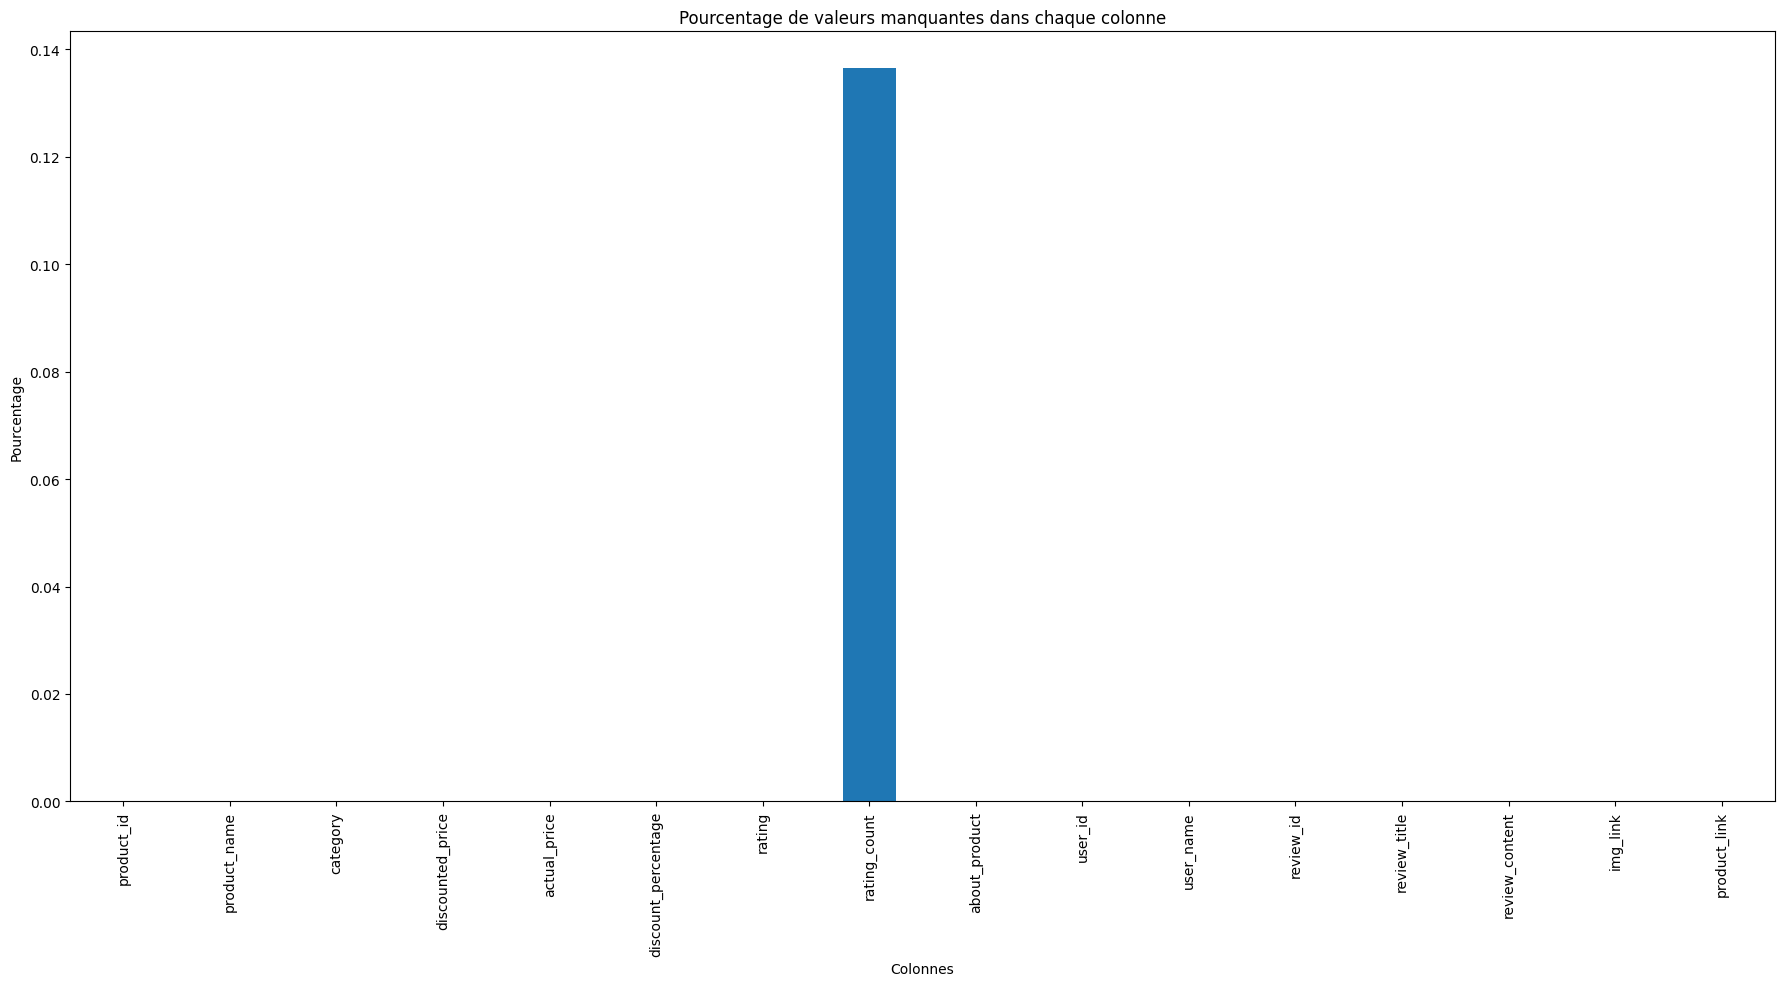

In [655]:
# tracer les valeurs nulles par leur pourcentage dans chaque colonne
plt.figure(figsize=(22, 10))
# tracer les valeurs nulles par leur pourcentage dans chaque colonne
pourcentage_manquant = df.isnull().sum()/len(df)*100
pourcentage_manquant.plot(kind='bar')
# ajouter les étiquettes
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage')
plt.title('Pourcentage de valeurs manquantes dans chaque colonne')

print("Nous ne visualisons que les lignes où il y a des valeurs nulles dans la colonne.")

In [656]:
# Afficher les lignes où il y a des valeurs nulles dans la colonne
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [657]:
# Remplacer les valeurs manquantes par la médiane
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [658]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Étape 1 : Nous avons nettoyé le jeu de données des valeurs nulles

# Gestion des doublons

Supprimer les doublons est essentiel pour obtenir des analyses précises et fiables.

Les doublons peuvent fausser les statistiques et surreprésenter certaines données.

In [659]:
# Trouver les doublons
bool(df.duplicated().any())

False

In [660]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [661]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

In [662]:
bool(any_duplicates)

False

Étape 2 : Aucun doublon trouvé

# 2. Data Visualization

Nuage de points

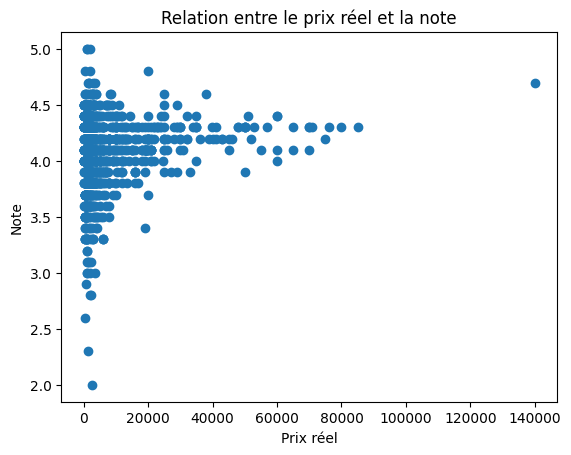

In [663]:
# Tracer actual_price par rapport à rating
plt.scatter(df['actual_price'], df['rating'])
plt.title('Relation entre le prix réel et la note')
plt.xlabel('Prix réel')
plt.ylabel('Note')
plt.show()

- La qualité perçue ne dépend pas du prix.
- Les produits peu chers peuvent satisfaire les clients autant, voire plus, que les produits plus chers.

In [664]:
# ne pas afficher les avertissements
import warnings
warnings.filterwarnings('ignore')

Histogramme

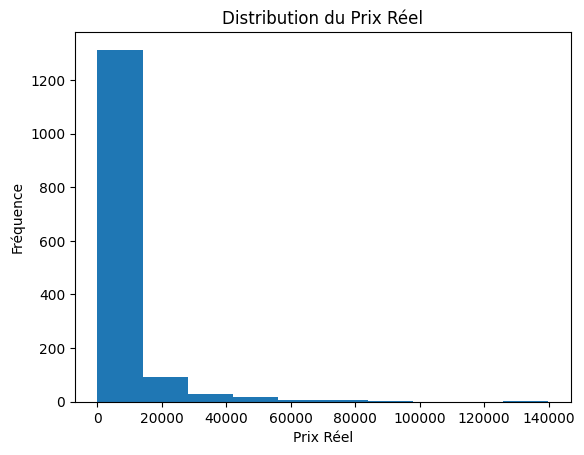

In [665]:
# Tracer la distribution de actual_price
plt.hist(df['actual_price'])
plt.title('Distribution du Prix Réel')
plt.xlabel('Prix Réel')
plt.ylabel('Fréquence')
plt.show()

- Le cœur du business Amazon semble reposer sur les produits d’entrée de gamme.
- Les produits à prix très élevé ne constituent qu’une niche marginale.
- Il est recommandé de se focaliser sur les tranches de prix dominantes (ex : 0 à 10 000) pour une analyse pertinente des performances.

In [666]:
from sklearn.preprocessing import LabelEncoder
# encoder les variables catégorielles avec un label

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()


df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

Heatmap

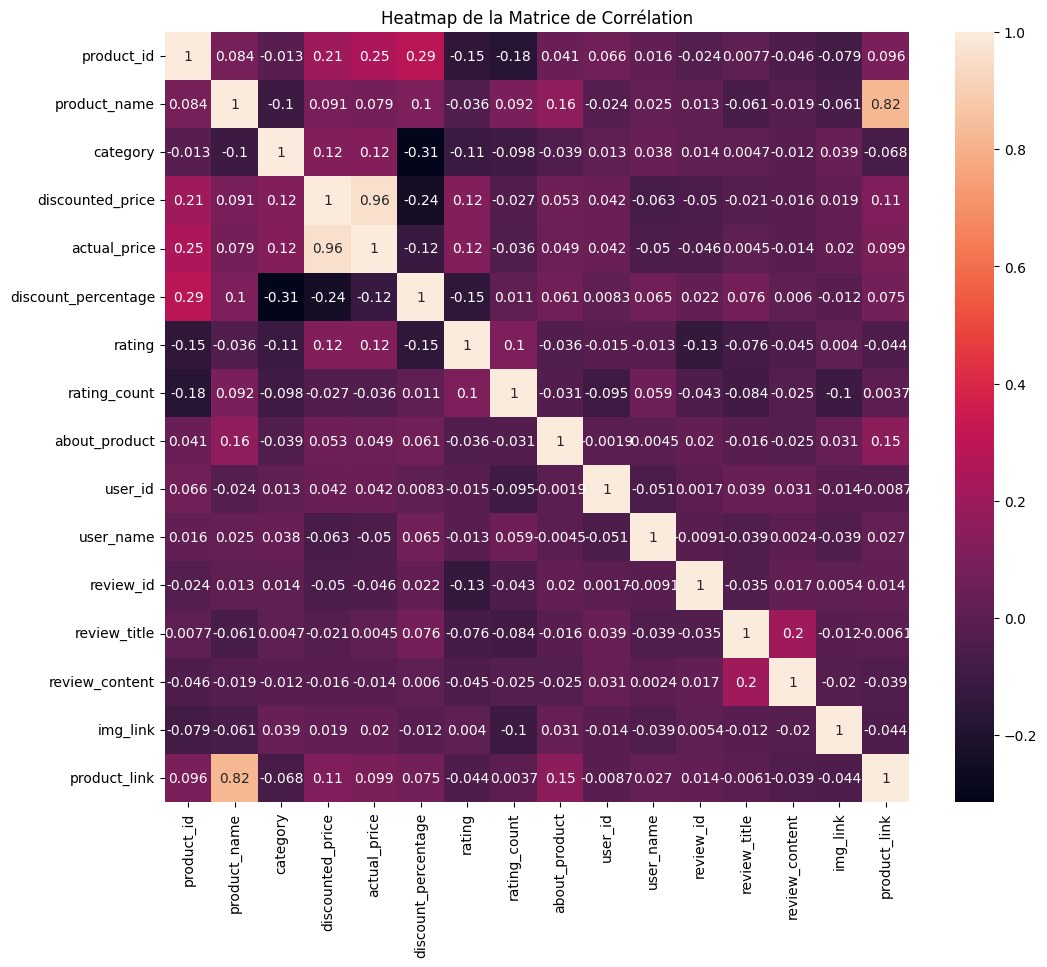

In [667]:
# Tracer la matrice de corrélation avec une taille de figure plus grande
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()

- Les notes ne dépendent pas du prix : il faut donc chercher ailleurs (description, service, qualité réelle).
- Les produits avec des remises élevées sont souvent des produits moins chers, peut-être pour booster leur visibilité.
- La matrice permet de valider les intuitions vues dans les autres graphiques : très utile pour appuyer tes conclusions.

Analyse de corrélation

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

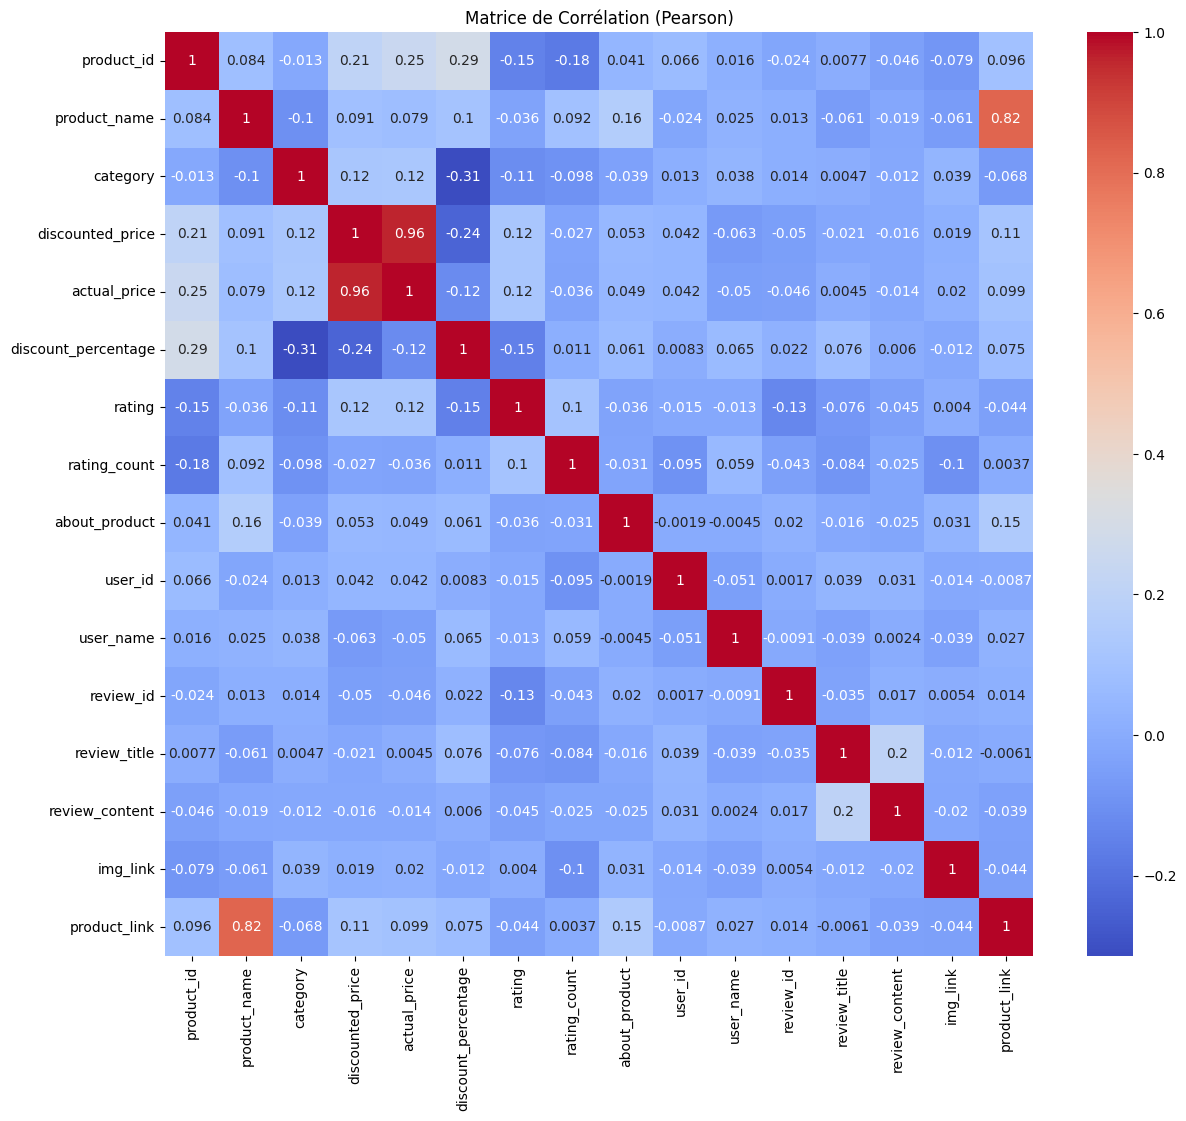

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

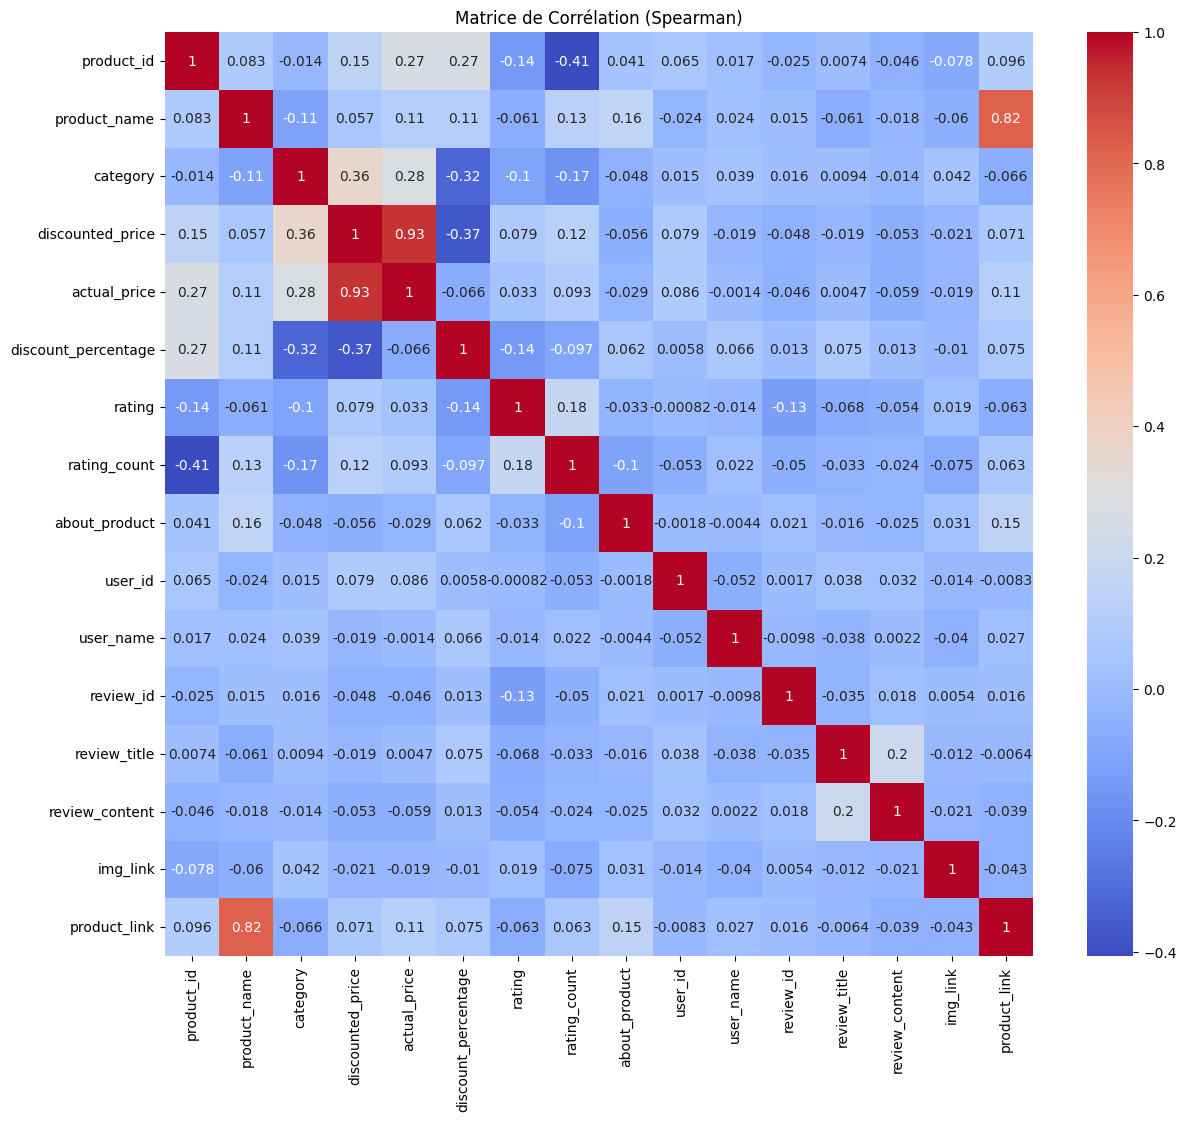

In [668]:
# Calculer les coefficients de corrélation de Pearson
correlation_matrix = df.corr()

# Imprimer la matrice de corrélation
print(correlation_matrix)

# Créer une carte thermique pour visualiser les corrélations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation (Pearson)")
plt.show()

# Calculer les coefficients de corrélation de Spearman (pour les relations non linéaires)
spearman_correlation_matrix = df.corr(method="spearman")

# Imprimer la matrice de corrélation de Spearman
print(spearman_correlation_matrix)

# Créer une carte thermique pour visualiser les corrélations de Spearman
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation (Spearman)")
plt.show()

In [669]:
# Calculer le coefficient de corrélation entre le prix du produit et les ventes
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Imprimer le coefficient de corrélation
print(correlation_coefficient)

0.12174449609998352


# Regroupement et Agrégation

In [670]:
# Calculer la moyenne des ventes par catégorie de produit
grouped_df = df.groupby('category')['rating'].mean()

# Imprimer la moyenne des ventes par catégorie de produit
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


Calculer les statistiques sommaires pour les groupes

In [671]:
# Note moyenne par catégorie
moyenne_notes_par_categorie = df.groupby('category')['rating'].mean()
print(moyenne_notes_par_categorie)

# Médiane des notes par contenu de l'avis
mediane_notes_par_contenu_avis = df.groupby('review_content')['rating'].median()
print(mediane_notes_par_contenu_avis)

# Écart-type du prix réel par nom de produit
ecart_type_prix_par_nom_produit = df.groupby('product_name')['actual_price'].std()
print(ecart_type_prix_par_nom_produit)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


Création des tableaux croisés dynamiques

In [672]:
# Tableau croisé dynamique des notes par catégorie et emplacement du client
tableau_croise = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(tableau_croise)

# Tableau croisé dynamique de la moyenne des rating_count par groupe d'âge des clients et catégorie de produit
tableau_croise = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(tableau_croise)


product_link  0     1     2     3     4     5     6     7     8     9     \
category                                                                   
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
206            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
207            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
208            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
209            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
210            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

product_lin

Tests statistiques

In [673]:
import scipy.stats as stats

# Effectuer un test t pour comparer les notes entre deux catégories
t_statistique, valeur_p = stats.ttest_ind(
    df[df['category'] == 'electronics']['rating'], 
    df[df['category'] == 'clothing']['rating']
)

# Imprimer la statistique t et la valeur p
print(t_statistique, valeur_p)

nan nan


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int64  
 1   product_name         1465 non-null   int64  
 2   category             1465 non-null   int64  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   int64  
 9   user_id              1465 non-null   int64  
 10  user_name            1465 non-null   int64  
 11  review_id            1465 non-null   int64  
 12  review_title         1465 non-null   int64  
 13  review_content       1465 non-null   int64  
 14  img_link             1465 non-null   int64  
 15  product_link         1465 non-null   i

In [675]:
# Test du chi-carré

# Créer un tableau de contingence
tableau_de_contingence = pd.crosstab(df['actual_price'], df['rating'])
tableau_de_contingence

rating,2.0,2.3,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
actual_price,,,,,,,,,,,,,,,,,,,,,,,,,
39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
79.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
75990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [676]:
# effectuer le test du chi-carré
chi2, p, dof, expected = stats.chi2_contingency(tableau_de_contingence)

# imprimer les résultats
print('Statistique du chi-carré :', chi2)
print('Valeur p :', p)
print('Degrés de liberté :', dof)
print(f"Attendu :\n {expected}")

Statistique du chi-carré : 8635.264277480239
Valeur p : 1.0
Degrés de liberté : 10752
Attendu :
 [[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


In [677]:
# inverser la transformation des données

df['product_id'] = le_product_id.inverse_transform(df['product_id'])
df['category'] = le_category.inverse_transform(df['category'])
df['review_id'] = le_review_id.inverse_transform(df['review_id'])
df['review_content'] = le_review_content.inverse_transform(df['review_content'])
df['product_name'] = le_product_name.inverse_transform(df['product_name'])
df['user_name'] = le_user_name.inverse_transform(df['user_name'])
df['about_product'] = le_about_product.inverse_transform(df['about_product'])
df['user_id'] = le_user_id.inverse_transform(df['user_id'])
df['review_title'] = le_review_title.inverse_transform(df['review_title'])
df['img_link'] = le_img_link.inverse_transform(df['img_link'])
df['product_link'] = le_product_link.inverse_transform(df['product_link'])

# Question 1 : Quelle est la note moyenne pour chaque catégorie de produit ?

In [678]:
import pandas as pd

# Vérifier le type de données de la colonne "rating"
print(df["rating"].dtype)

# Si le type de données n'est pas numérique, le convertir en numérique
if df["rating"].dtype == "object":
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # Gérer les erreurs potentielles

# Calculer le classement des notes moyennes après s'être assuré du type de données numérique
classement_notes = df.groupby("category")["rating"].mean().sort_values(ascending=False).reset_index()

print(classement_notes)

float64
                                              category  rating
0                        Computers&Accessories|Tablets     4.6
1    Computers&Accessories|NetworkingDevices|Networ...     4.5
2     Electronics|Cameras&Photography|Accessories|Film     4.5
3              Computers&Accessories|Components|Memory     4.5
4    Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
206  Computers&Accessories|Accessories&Peripherals|...     3.6
207  Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
208  Computers&Accessories|Accessories&Peripherals|...     3.5
209  Computers&Accessories|Accessories&Peripherals|...     3.4
210  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


Réponse 1 :

Les résultats montrent que la plupart des catégories de produits reçoivent généralement des avis positifs de la part des clients, avec des notes moyennes supérieures à 3,50. Cependant, certaines catégories (par exemple, 209 et 210) ont des notes plus basses, ce qui suggère des domaines potentiels d'amélioration. Une analyse plus approfondie de ces catégories pourrait aider à identifier les raisons spécifiques des avis moins favorables et à proposer des solutions potentielles.

# Question 2 : Quels sont les produits avec le plus grand nombre d'évaluations par catégorie ?

In [687]:
import pandas as pd

top_reviewed_per_category = (
    df.groupby("category")
    .apply(lambda x: x.nlargest(10, "rating_count"))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)



     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
815  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
816  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
817  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
818  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
819  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...            2339.0   
1    Co

Réponse 2 :

Les résultats mettent en évidence des produits susceptibles d'être populaires dans leurs catégories en raison d'un nombre élevé d'évaluations, ce qui suggère un intérêt et un engagement des clients.

Le nombre d'évaluations varie de 9 à 15867, impliquant des niveaux d'attention et de retour d'information variables selon les produits.

La plupart des produits listés ont des notes supérieures à 3,5, indiquant une expérience client généralement positive.

Les produits avec le plus grand nombre d'évaluations dans leurs catégories pourraient être considérés comme des vendeurs potentiels, même sans données de vente directes.

# Question 3 : Quelle est la distribution des prix réduits par rapport aux prix réels ?

<Axes: >

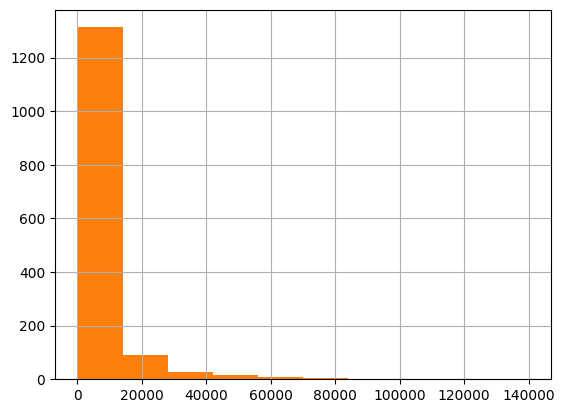

In [680]:
import pandas as pd

# Créer des histogrammes
df["discounted_price"].hist(label="Prix Réduit")
df["actual_price"].hist(label="Prix Réel")

# Calculer et analyser les pourcentages de réduction
df["discount_percentage"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"] * 100
df["discount_percentage"].describe()
df["discount_percentage"].hist(label="Pourcentage de Réduction")

Réponse 3 :

Les résultats montrent que les prix réduits sont généralement inférieurs aux prix réels, avec un prix réduit médian de 200$ et un prix réel médian de 400$.

La distribution des pourcentages de réduction est asymétrique vers la gauche, avec la plupart des produits ayant une réduction de 30 % ou moins.

Les résultats suggèrent qu'il pourrait y avoir des opportunités d'augmenter les prix réduits ou les pourcentages de réduction pour attirer plus de clients.

# Question 4 : Comment le pourcentage moyen de réduction varie-t-il selon les catégories ?

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

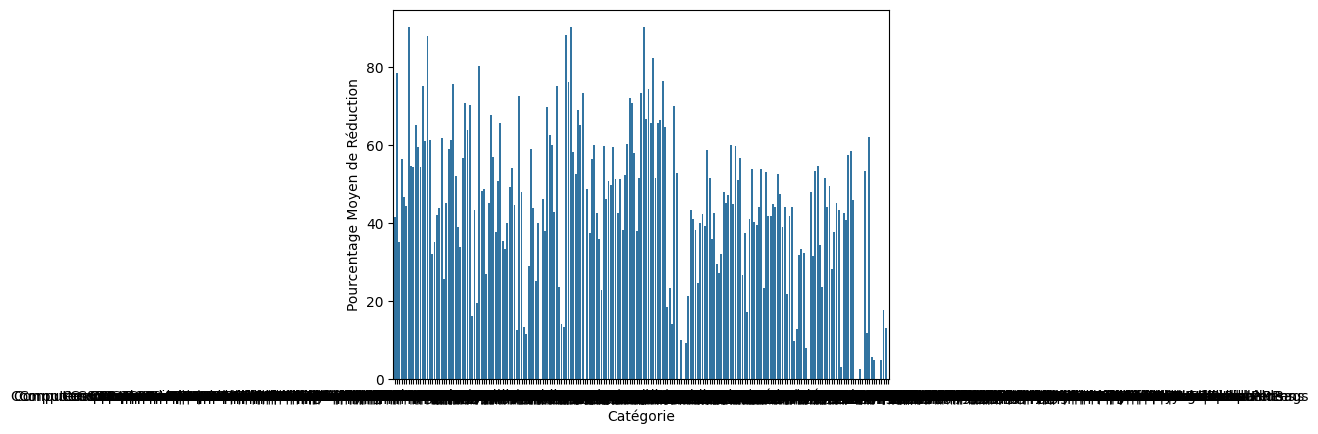

In [681]:
# Calculer le pourcentage moyen de réduction par catégorie
moyenne_reduction_par_categorie = df.groupby('category')['discount_percentage'].mean()

# Afficher les résultats
print(moyenne_reduction_par_categorie)

# Optionnel : Visualisation
sns.barplot(x=moyenne_reduction_par_categorie.index, y=moyenne_reduction_par_categorie.values)
plt.xlabel("Catégorie")
plt.ylabel("Pourcentage Moyen de Réduction")
plt.show()

Réponse 4:

Les pourcentages de réduction moyens varient considérablement selon les catégories, allant de 0 % à 78,39 %.

Les catégories 1 et 3 se distinguent par des réductions moyennes nettement plus élevées (78,39 % et 56,34 %), suggérant des facteurs potentiels tels que des efforts de liquidation, une forte concurrence ou des marges bénéficiaires plus faibles.

Les catégories 0, 206, 207, 210 ont des réductions moyennes de 0 %, indiquant une tarification cohérente ou une forte demande pour les produits de ces catégories.

D'autres catégories présentent des pourcentages de réduction variés, reflétant probablement des stratégies de tarification diversifiées et des dynamiques de marché.

# Question 5: Quels sont les noms de produits les plus populaires ?

In [682]:
# Compter les occurrences des noms de produits
compte_produits = df["product_name"].value_counts()

# Trier par ordre décroissant et afficher les meilleurs résultats
print(compte_produits.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                           3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                                                             

Réponse 5:

La montre connectée Fire-Boltt Ninja Call Pro Plus est le produit le plus populaire, suivie par la montre connectée Fire-Boltt Phoenix.

Les montres connectées et les câbles de charge sont les catégories de produits les plus populaires.

Plusieurs marques sont représentées, avec boAt apparaissant deux fois.

La charge rapide, la durabilité et la fonctionnalité sont des caractéristiques clés.

La popularité est relativement bien répartie au-delà du produit leader.

# Question 6: Quels sont les mots-clés de produits les plus populaires ?

In [683]:
def extraire_mots_cles(nom_produit):
  """Extrait les mots-clés d'un nom de produit, en gérant les nombres potentiels."""
  if isinstance(nom_produit, str):  # Vérifie si c'est une chaîne de caractères
    mots_cles = nom_produit.lower().split()  # Divise en mots et met en minuscule
    mots_cles = [mot for mot in mots_cles if mot.isalpha()]  # Supprime les caractères non alphabétiques
  else:
    mots_cles = []  # Gère les valeurs non-chaînes (par exemple, entiers) en retournant une liste vide
  return mots_cles

# Applique la fonction pour extraire les mots-clés
df["mots_cles"] = df["product_name"].apply(extraire_mots_cles)

# Aplatir la liste des mots-clés
tous_les_mots_cles = [mot_cle for mots_cles in df["mots_cles"] for mot_cle in mots_cles]

# Compter les occurrences des mots-clés
compte_mots_cles = pd.Series(tous_les_mots_cles).value_counts()

# Afficher les 10 mots-clés les plus populaires
print(compte_mots_cles.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


Réponse 6:

La connectivité USB, la charge (notamment la charge rapide) et les câbles sont des caractéristiques de produit importantes.

Les prépositions et conjonctions comme "avec", "pour", "et", "à" suggèrent un accent sur l'explication de la compatibilité des produits et des scénarios d'utilisation.

Les câbles et les appareils intelligents sont probablement bien représentés dans le jeu de données.

Les noms de produits ont tendance à être concis et utilisent des mots courants, ce qui pourrait bénéficier de techniques d'extraction de mots-clés affinées.

# Question 7: Quels sont les avis de produits les plus populaires ?

In [684]:
from textblob import TextBlob  # Import TextBlob library
# Select review column
df[["product_id", "user_id", "review_content"]]

# Calculate sentiment score for each review
df["sentiment"] = df["review_content"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Sort by sentiment score (ascending for positive)
df_sorted = df.sort_values(by="sentiment", ascending=True)

# Display top reviews based on a desired number (e.g., top 10)
top_reviews = df_sorted.head(10)
print(top_reviews)

      product_id                                       product_name  \
155   B09XJ1LM7R  7SEVEN® Compatible for Tata Sky Remote Origina...   
1237  B0B7NWGXS6  Havells Bero Quartz Heater Black 800w 2 Heat S...   
145   B00RFWNJMC  Airtel DigitalTV DTH Remote SD/HD/HD Recording...   
723   B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
152   B08PV1X771  Samsung 80 cm (32 inches) Wondertainment Serie...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
738   B08MZQBFLN  Callas Multipurpose Foldable Laptop Table with...   
1367  B07LG96SDB  ESN 999 Supreme Quality 1500W Immersion Water ...   

                                               category  discounted_price  \
155   Electronics|HomeTheater,TV&Video|Accessories|R...             399.0   
1237  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...         

Réponse 7:

Les scores de sentiment globaux sont relativement bas, suggérant une tendance vers des avis neutres ou légèrement négatifs dans l'échantillon.

L'avis avec le score de sentiment le plus élevé est "I have installed this in my kitchen working fine" (product_id 1463) avec un score de -0.170167, indiquant un sentiment légèrement positif.

L'avis avec le score de sentiment le plus bas est "tv on off not working, so difficult to battery charge" (product_id 155) avec un score de -0.600000, suggérant un sentiment fortement négatif.

Plusieurs avis mentionnent des problèmes de charge de batterie (product_id 155), de qualité de produit (product_id 1237), et de facilité d'utilisation (product_id 1198), soulignant des domaines potentiels d'amélioration.

Certains avis expriment à la fois des aspects positifs et négatifs dans le même texte, comme "Like and happy,,Please don't buy this heater" (product_id 1237), suggérant une évaluation nuancée du produit.

La colonne user_id semble contenir des virgules, indiquant plusieurs identifiants utilisateur pour certains avis. Cela pourrait nécessiter une enquête pour assurer l'exactitude.

Les avis pour product_id 22, 152, et 723 ont un contenu identique, suggérant une duplication potentielle des données ou des erreurs.

# Question 8 : Quelle est la corrélation entre le prix réduit et la note ?

In [685]:
# Calculer le coefficient de corrélation
coefficient_de_correlation = df["discounted_price"].corr(df["rating"])

# Afficher le coefficient de corrélation avec deux décimales
print(f"Corrélation entre le prix réduit et la note : {coefficient_de_correlation:.2f}")

Corrélation entre le prix réduit et la note : 0.12


Réponse 8:

Le prix réduit et la note ont une faible corrélation positive. Cela signifie que les produits avec des prix réduits plus élevés ont tendance à avoir des notes légèrement plus élevées, mais la relation n'est pas très forte.

# Question 9 : Quelles sont les 5 catégories avec les meilleures notes ?

In [686]:
# Regrouper les données par catégorie et calculer la note moyenne
notes_moyennes = df.groupby("category")["rating"].mean().reset_index()

# Trier par note moyenne par ordre décroissant
notes_moyennes = notes_moyennes.sort_values(by="rating", ascending=False)

# Afficher les 5 meilleures catégories
print("Top 5 des catégories avec les notes moyennes les plus élevées :")
for i in range(5):
    categorie = notes_moyennes.iloc[i]["category"]
    note_moyenne = notes_moyennes.iloc[i]["rating"]
    print(f"{i+1}. {categorie} : {note_moyenne:.2f}")

Top 5 des catégories avec les notes moyennes les plus élevées :
1. Computers&Accessories|Tablets : 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters : 4.50
3. Electronics|Cameras&Photography|Accessories|Film : 4.50
4. Computers&Accessories|Components|Memory : 4.50
5. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients : 4.50


Réponse 9:

Les 5 meilleures catégories ont des notes moyennes comprises entre 4,50 et 4,60, indiquant une satisfaction client globalement positive dans ces domaines.

La plupart des catégories les mieux notées appartiennent à des domaines liés à la technologie, y compris les tablettes, les appareils de réseau, les accessoires de photographie, les dispositifs de streaming multimédia et les calculatrices.

Au sein de catégories plus larges comme "Informatique & Accessoires" et "Électronique", des sous-catégories spécifiques émergent comme particulièrement bien notées, telles que les tablettes, les adaptateurs CPL, les accessoires de film et les clients de streaming.

Quatre catégories partagent une note de 4,50, suggérant des niveaux similaires de satisfaction client dans ces domaines.

La présence de "Calculatrices de base" dans le top 5 suggère que même des produits relativement simples peuvent obtenir des notes élevées s'ils répondent efficacement aux besoins des clients.

# Conclusion

L'objectif principal de ce projet est d'analyser le jeu de données des ventes Amazon et d'identifier des insights basés sur les données. Le jeu de données des ventes Amazon est une ressource précieuse tant pour les entreprises que pour les chercheurs. Il fournit une mine d'informations sur le comportement des clients, les tendances des produits et les conditions du marché. En réalisant une analyse exploratoire des données (EDA) sur ce jeu de données, les entreprises peuvent obtenir des insights précieux qui peuvent les aider à prendre de meilleures décisions concernant leurs produits, leur marketing et leurs opérations.